# Praktikum Big Data Pertemuan 1: Pengenalan Big Data dan Overview Teknologi

## Tujuan
Pada akhir praktikum ini, mahasiswa diharapkan mampu:
1. Memahami konsep dasar Big Data.
2. Menjelaskan karakteristik dan tantangan Big Data (Volume, Variety, Velocity, dan Veracity).
3. Mengenal teknologi yang digunakan dalam ekosistem Big Data.
4. Menginstal dan mengonfigurasi Anaconda untuk bekerja dengan alat Big Data seperti Hadoop dan Spark.
5. Memulai praktik sederhana terkait pengolahan data menggunakan PySpark dan Pandas.

## Peralatan yang Dibutuhkan
1. Anaconda (untuk manajemen lingkungan)
2. Jupyter Notebook (bawaan dari Anaconda)
3. PySpark (untuk pemrosesan data skala besar)
4. Pandas (untuk data analysis)
5. Python (bawaan dari Anaconda)

## 1. Instalasi Anaconda

In [ ]:
pip install pyspark==3.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285391 sha256=4709162c568c0a486e499443f7f201500b635aa3f38bf4426391b5ce7fa2c28b
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
pip install pandas

In [ ]:
pip install findspark

## 2. Pengenalan dan Praktik Dasar PySpark dan Pandas

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



- **Tugas 1**: Jalankan kode di atas dan buat modifikasi dengan menambahkan data lain berupa kolom pekerjaan, hobi dan gender.

In [18]:
from pyspark.sql import SparkSession

# Memulai Spark session
sparks = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Memodifikasi dataframe
data = [("Ali", 34, "PNS", "Memancing", "L"),
        ("Budi", 23, "Staff Start-up", "Main roblox", "L"),
        ("Citra", 29, " Pegawai bank", "Nonton konser", " P"),
        ("Dina", 45, "Ibu rumah tangga", " Pilates", "P")]
columns = ["Nama", "Usia", " Pekerjaan", "Hobi", "Gender"]
df = sparks.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-----+----+----------------+-------------+------+
| Nama|Usia|       Pekerjaan|         Hobi|Gender|
+-----+----+----------------+-------------+------+
|  Ali|  34|             PNS|    Memancing|     L|
| Budi|  23|  Staff Start-up|  Main roblox|     L|
|Citra|  29|    Pegawai bank|Nonton konser|     P|
| Dina|  45|Ibu rumah tangga|      Pilates|     P|
+-----+----+----------------+-------------+------+



## 3. Praktik PySpark Lanjutan
- **Latihan 1**: Memanipulasi Data dengan PySpark.

In [ ]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



- **Tugas 2**: Lakukan filter, penghitungan rata-rata, dan pengurutan data menggunakan PySpark.

In [19]:
from pyspark.sql import SparkSession

# Memulai Spark session
sparks = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data_rapor = [("Bahasa Indonesia", 87), ("IPA", 83), ("IPS", 93),
              ("Matematika", 80), ("Sejarah", 91)]
kolom = ["Mata Pelajaran", "Nilai"]
dframe = sparks.createDataFrame(data_rapor, kolom)

# Menampilkan DataFrame
print ("DataFrame nilai raport")
dframe.show()

# Filtering data
dframe_filtered = dframe.filter(dframe["Nilai"] > 90)
print ("Filtering nilai mata pelajaran lebih dari 90")
dframe_filtered.show()

# Menghitung rata-rata nilai
from pyspark.sql.functions import avg
print ("Rata-rata nilai raport")
dframe.groupBy().agg(avg("Nilai")).show()

# Mengurutkan data berdasarkan nilai
dframe_sorted = dframe.orderBy("Nilai", ascending=False)
print ("Mengurutkan nilai raport dari yang terbesar")
dframe_sorted.show()

DataFrame nilai raport
+----------------+-----+
|  Mata Pelajaran|Nilai|
+----------------+-----+
|Bahasa Indonesia|   87|
|             IPA|   83|
|             IPS|   93|
|      Matematika|   80|
|         Sejarah|   91|
+----------------+-----+

Filtering nilai mata pelajaran lebih dari 90
+--------------+-----+
|Mata Pelajaran|Nilai|
+--------------+-----+
|           IPS|   93|
|       Sejarah|   91|
+--------------+-----+

Rata-rata nilai raport
+----------+
|avg(Nilai)|
+----------+
|      86.8|
+----------+

Mengurutkan nilai raport dari yang terbesar
+----------------+-----+
|  Mata Pelajaran|Nilai|
+----------------+-----+
|             IPS|   93|
|         Sejarah|   91|
|Bahasa Indonesia|   87|
|             IPA|   83|
|      Matematika|   80|
+----------------+-----+



## 4. Praktik dengan Pandas
- **Latihan 2**:  Buat DataFrame menggunakan Pandas:

In [11]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
df_pandas

,Nama,Usia
0,Ali,34
1,Budi,23
2,Citra,29
3,Dina,45


- **Tugas 3**: Modifikasi DataFrame Pandas dengan menambahkan kolom baru dan melakukan operasi seperti filtering data berdasarkan grade.

In [12]:
import pandas as pd

# Membuat DataFrame Pandas
datapandas = {"Mata Pelajaran": ["Bahasa Indonesia", "IPA", "IPS", "Matematika", "Sejarah"],
               "Nilai" : [87, 83, 93, 90, 91],
               "Grade": ["B", "C", "A", "C", "A"]}
dfpandas = pd.DataFrame(datapandas)

# Filtering berdasarkan Grade
df_filtergrade = dfpandas[dfpandas["Grade"] == "A"]

# Menampilkan DataFrame Pandas
print ("DataFreame asli")
display(dfpandas)
print ("\nHasil filtering Grade A")
display(df_filtergrade)

DataFreame asli


,Mata Pelajaran,Nilai,Grade
0,Bahasa Indonesia,87,B
1,IPA,83,C
2,IPS,93,A
3,Matematika,90,C
4,Sejarah,91,A



Hasil filtering Grade A


,Mata Pelajaran,Nilai,Grade
2,IPS,93,A
4,Sejarah,91,A


## 5. Praktik Pandas Lanjutan
- **Latihan 3**: Penggunaan Pandas untuk operasi lebih kompleks.

    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


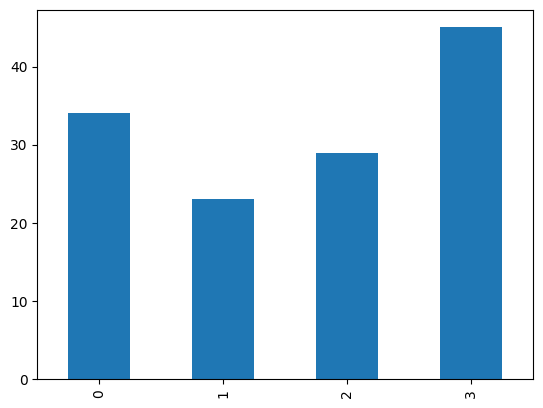

In [13]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

- **Tugas 4**: Lakukan penggabungan DataFrame dan visualisasikan data dengan Pandas.

     Mata Pelajaran  Nilai Grade
0  Bahasa Indonesia     87     B
1               IPA     83     C
2               IPS     93     A
3        Matematika     90     C
4           Sejarah     91     A

Visualisasi Data


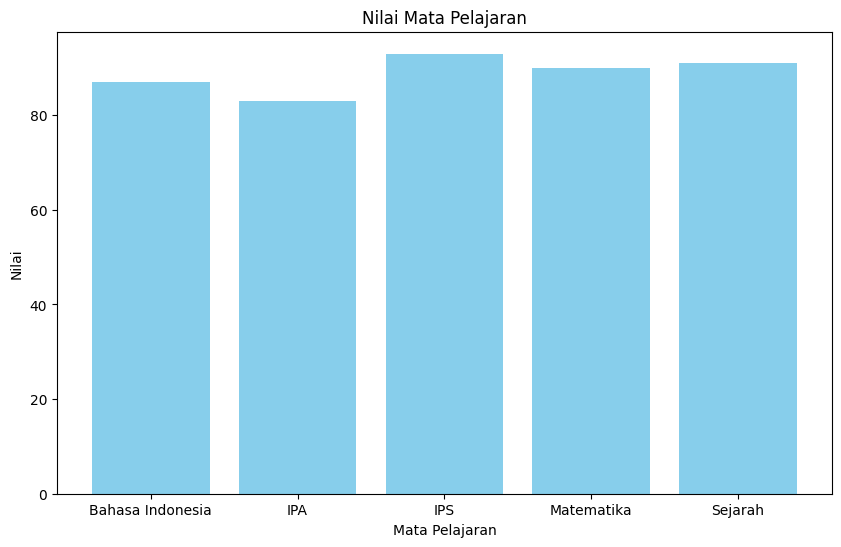

In [14]:
import pandas as pd

# Membuat DataFrame Pandas
data_1 = {"Mata Pelajaran": ["Bahasa Indonesia", "IPA", "IPS", "Matematika", "Sejarah"],
          "Nilai" : [87, 83, 93, 90, 91]}
df_pandas = pd.DataFrame(data_1)

# Membuat DataFrame kedua
data_2 = {"Mata Pelajaran": ["Bahasa Indonesia", "IPA", "IPS", "Matematika", "Sejarah"],
          "Grade": ["B", "C", "A", "C", "A"]}
df_pandas_2 = pd.DataFrame(data_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Mata Pelajaran")
print(df_joined)

# Visualisasi nilai untuk setiap mata pelajaran
plt.figure(figsize=(10, 6))
plt.bar(df_joined["Mata Pelajaran"], df_joined["Nilai"], color='skyblue')
plt.xlabel("Mata Pelajaran")
plt.ylabel("Nilai")
plt.title("Nilai Mata Pelajaran")
plt.xticks(rotation=0)
print("\nVisualisasi Data")
plt.show()

## 5. Menggabungkan PySpark dan Pandas
- **Latihan 4: Mengonversi DataFrame antara PySpark dan Pandas**
  Praktik untuk convert DataFrame dari PySpark ke Pandas dan sebaliknya:

In [25]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

+----------------+-----+
|  Mata Pelajaran|Nilai|
+----------------+-----+
|Bahasa Indonesia|   87|
|             IPA|   83|
|             IPS|   93|
|      Matematika|   90|
|         Sejarah|   91|
+----------------+-----+



(    Nama  Usia         Pekerjaan           Hobi Gender
 0    Ali    34               PNS      Memancing      L
 1   Budi    23    Staff Start-up    Main roblox      L
 2  Citra    29      Pegawai bank  Nonton konser      P
 3   Dina    45  Ibu rumah tangga        Pilates      P,
 None)

- **Tugas 5**: Gunakan metode ini untuk menggabungkan data yang Anda buat di PySpark dengan data dari Pandas, kemudian lakukan analisis sederhana seperti menghitung rata-rata nilai.

In [26]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = sparks.createDataFrame(df_pandas)

# Menggabungkan data
df_joined = pd.merge(df_pandas, df_pandas_2, on="Mata Pelajaran")
print(df_joined)

# Konversi hasil gabungan dataframe
df_spark_from_pandas = sparks.createDataFrame(df_pandas)
df_spark_from_pandas.show()

# Menghitung rata-rata nilai raport
df_spark_from_pandas.groupBy().agg(avg("Nilai")).show()

     Mata Pelajaran  Nilai Grade
0  Bahasa Indonesia     87     B
1               IPA     83     C
2               IPS     93     A
3        Matematika     90     C
4           Sejarah     91     A
+----------------+-----+
|  Mata Pelajaran|Nilai|
+----------------+-----+
|Bahasa Indonesia|   87|
|             IPA|   83|
|             IPS|   93|
|      Matematika|   90|
|         Sejarah|   91|
+----------------+-----+

+----------+
|avg(Nilai)|
+----------+
|      88.8|
+----------+



## 6. Konversi Data antara PySpark dan Pandas
- **Tugas 6**: Gabungkan data dari PySpark dan Pandas, lalu lakukan operasi statistik seperti menghitung nilai maksimum.

In [28]:
# Menggabungkan data dari PySpark dan Pandas
df_joined = pd.merge(df_pandas, df_pandas_2, on="Mata Pelajaran")
print(df_joined)

# Operasi statistik
nilai_maksimum = df_pandas["Nilai"].max()
mata_pelajaran_nilai_maksimum = df_pandas.loc[df_pandas["Nilai"].idxmax(), "Mata Pelajaran"]

print(f"\nNilai maksimum: {nilai_maksimum}")
print(f"Mata Pelajaran dengan nilai maksimum: {mata_pelajaran_nilai_maksimum}")

     Mata Pelajaran  Nilai Grade
0  Bahasa Indonesia     87     B
1               IPA     83     C
2               IPS     93     A
3        Matematika     90     C
4           Sejarah     91     A

Nilai maksimum: 93
Mata Pelajaran dengan nilai maksimum: IPS
